In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

ModuleNotFoundError: No module named 'statsmodels'

In [11]:
df = pd.read_csv('Train_TEC_mar17.csv')

In [12]:
df.head()

,LT,TEC
0,5.311333,2.067562
1,5.344670,2.082707
2,5.378006,2.004272
3,5.411343,1.736569
4,5.444679,1.758503


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LT      14400 non-null  float64
 1   TEC     14400 non-null  float64
dtypes: float64(2)
memory usage: 225.1 KB


In [5]:
# # df.LT = pd.to_datetime(df.LT)
# df.index.freq = '72'
# a = seasonal_decompose(df['TEC'], model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
# a.plot();

In [14]:
df = df.set_index("LT")
df.head()
df = df.sort_index()

In [15]:
df.index.freq = 'MS'

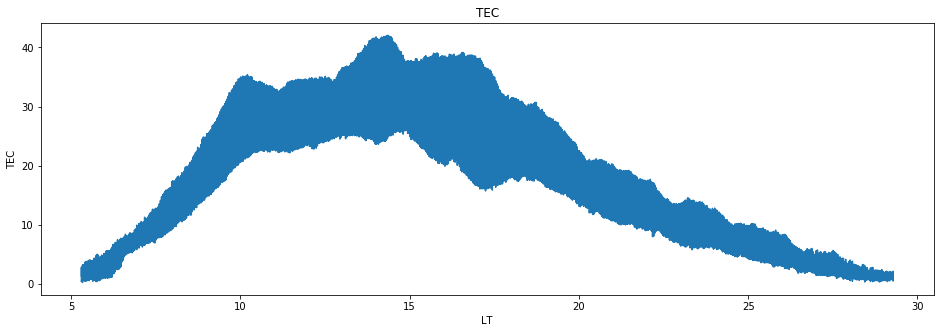

In [16]:
ax = df['TEC'].plot(figsize = (16,5), title = "TEC")
ax.set(xlabel='LT', ylabel='TEC');

In [9]:
# auto_arima(df['TEC'], seasonal=True, m=1,max_p=7500, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

In [17]:
dft = pd.read_csv('Test_TEC_mar17.csv')

In [18]:
dft = dft.set_index("LT")
dft.head()
dft = dft.sort_index()

In [19]:
train_data = df[:len(df)]
test_data = df[:len(dft)]

In [20]:
# train_data = df[0:14400]
# # test_data = df[len(df)-12:]

In [21]:
arima_model = SARIMAX(train_data['TEC'], order = (1,1,1))
arima_result = arima_model.fit()
arima_result.summary()

NameError: name 'SARIMAX' is not defined

In [15]:
arima_pred = arima_result.predict(start = 1, end = len(dft), typ="levels").rename("ARIMA Predictions")
arima_pred
p_tec=[]
#append predicted values into the list
for i in arima_pred:
    p_tec.append(i)
# print(p_tec)

In [16]:
# print(len(dft))
# print(len(p_tec))
#add the list into the test csv file data frame
dft["P_TEC"] = p_tec

dft.head()





,P_TEC
LT,
5.311570,1.358728
5.311605,1.396201
5.311638,1.258362
5.311668,1.189540
5.311694,1.237215


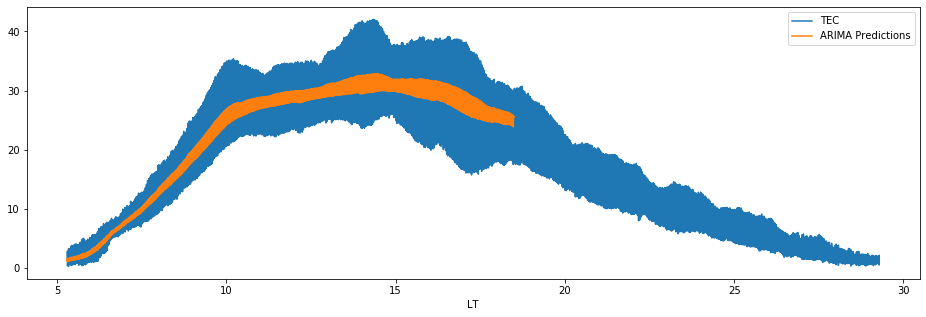

In [36]:
test_data['TEC'].plot(legend=True)
arima_pred.plot(figsize = (16,5),legend = True);
# plt.plot(dft['P_TEC'])[0:len(arima_pred)]


In [18]:
rmse_df=[]
#load values from training dataset
for c in df['TEC']:
    rmse_df.append(c)

p_dft=[]
#load values from prediction
for d in dft['P_TEC']:
    p_dft.append(d)

# print(p_dft)
rmse_df = rmse_df[0:7920]
# print((rmse_df))
# print(len(p_dft))
arima_rmse_error = rmse(rmse_df, arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = dft['P_TEC'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')
mean = sum(rmse_df)/len(rmse_df)
# v=[]
# for z in rmse_df:
#     v = z*z

# print(v)
# # for c in v:
# #     s = (c/len(rmse_df))

# # print(s - mean**2)
import statistics  
print(f'Standard deviation: {(statistics.variance(rmse_df))**0.5}')

    

MSE Error: 6.1639599680948685
RMSE Error: 2.4827323593361545
Mean: 22.694162330946888
Standard deviation: 9.805784096017403


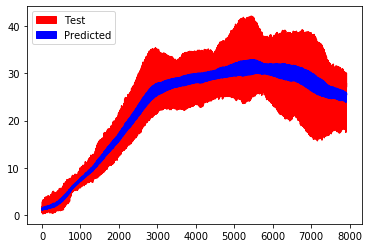

In [29]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='Test')
blue_patch = mpatches.Patch(color='blue', label='Predicted')

plt.legend(handles=[red_patch,blue_patch])
plt.plot(rmse_df ,'r') # plotting t, a separately 
plt.plot(p_dft, 'b') # plotting t, b separately 



## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [42]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [43]:
# scaler.fit(train_data)
# scaled_train_data = scaler.transform(train_data)
# scaled_test_data = scaler.transform(test_data)

<!-- Before creating LSTM model we should create a Time Series Generator object. -->

In [44]:
# from keras.preprocessing.sequence import TimeseriesGenerator

# n_input = 1
# n_features= 1
# generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [45]:
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.layers import LSTM

# lstm_model = Sequential()
# lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
# lstm_model.add(Dense(1))
# lstm_model.compile(optimizer='adam', loss='mse')

# lstm_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# lstm_model.fit_generator(generator,epochs=2)


Instructions for updating:
Please use Model.fit, which supports generators.


AttributeError: 'TimeseriesGenerator' object has no attribute 'shape'

In [115]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
# import keras
# import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# config = tf.ConfigProto( device_count = {'GPU': 1000 , 'CPU': 1} ) 
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

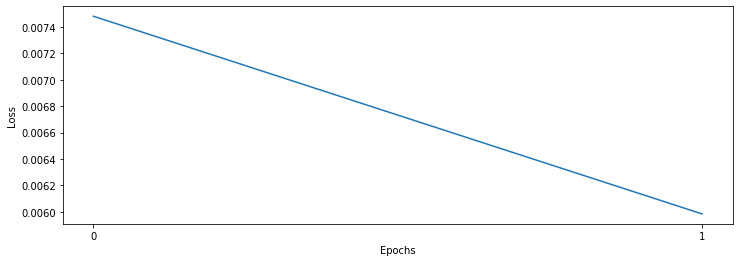

In [116]:
# losses_lstm = lstm_model.history.history['loss']
# # plt.figure(figsize=(12,4))
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.xticks(np.arange(0,21,1))
# plt.plot(range(len(losses_lstm)),losses_lstm);

In [117]:
# lstm_predictions_scaled = list()

# batch = scaled_train_data[-n_input:]
# current_batch = batch.reshape((1, n_input, n_features))

# for i in range(len(test_data)):   
#     lstm_pred = lstm_model.predict(current_batch)[0]
#     lstm_predictions_scaled.append(lstm_pred) 
#     current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [118]:
# lstm_predictions_scaled

[array([0.04098447], dtype=float32),
 array([0.04478031], dtype=float32),
 array([0.04696691], dtype=float32),
 array([0.04835964], dtype=float32),
 array([0.0492934], dtype=float32),
 array([0.04992493], dtype=float32),
 array([0.05036015], dtype=float32),
 array([0.05067007], dtype=float32),
 array([0.05089407], dtype=float32),
 array([0.05106072], dtype=float32),
 array([0.05118514], dtype=float32),
 array([0.05127804], dtype=float32),
 array([0.0513474], dtype=float32),
 array([0.05139918], dtype=float32),
 array([0.05143785], dtype=float32),
 array([0.05146671], dtype=float32),
 array([0.05148827], dtype=float32),
 array([0.05150436], dtype=float32),
 array([0.05151637], dtype=float32),
 array([0.05152534], dtype=float32),
 array([0.05153204], dtype=float32),
 array([0.05153704], dtype=float32),
 array([0.05154077], dtype=float32),
 array([0.05154356], dtype=float32),
 array([0.05154564], dtype=float32),
 array([0.05154719], dtype=float32),
 array([0.05154835], dtype=float32),
 ar

In [119]:
# lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [120]:
# lstm_predictions

array([[1.99725574],
       [2.15574638],
       [2.24704544],
       ...,
       [2.43848038],
       [2.43848038],
       [2.43848038]])

In [121]:
# test_data['LSTM_Predictions'] = lstm_predictions

In [122]:
# test_data

,TEC,LSTM_Predictions
LT,,
5.310988,1.358735,1.997256
5.311032,1.423198,2.155746
5.311049,1.104633,2.247045
5.311074,1.018259,2.305197
5.311108,1.246602,2.344185
...,...,...
29.278071,2.174445,2.438480
29.278114,1.703929,2.438480
29.278156,1.205574,2.438480


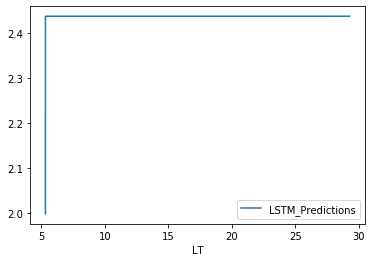

In [126]:
# train_data['TEC'].plot(figsize = (16,5), legend=True)
# test_data['LSTM_Predictions'].plot(legend = True);

In [125]:
# lstm_rmse_error = rmse(test_data['TEC'], test_data["LSTM_Predictions"])
# lstm_mse_error = lstm_rmse_error**2
# mean_value = df['TEC'].mean()

# print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')


MSE Error: 327.68572001924883
RMSE Error: 18.10209159238923
Mean: 17.016025176557285
